In [10]:
from GGMS.solvers import *
from GGMS.spd_generators import *
from GGMS.stat_funcs import *
from GGMS.experimenting import *
from GGMS.metrics import *
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import pickle
import multiprocessing as mp

In [11]:
N = 20
n = 40
S_obs = 10
S_exp = 50
density_params = [0.94, 0.87, 0.85, 0.77, 0.74, 0.68, 0.64, 0.55, 0.4] # 0.1 to 0.9
solvers = [SimInf(), Bonferroni(), Holm(), BenjaminiHochberg(), BenjaminiYekutieli()]
metrics = [FP, FN, FDR, TPR, F1]

In [7]:
with open('data\\1680613114.8243375_20_40.bin', 'rb') as f:
    density_frames = pickle.load(f)

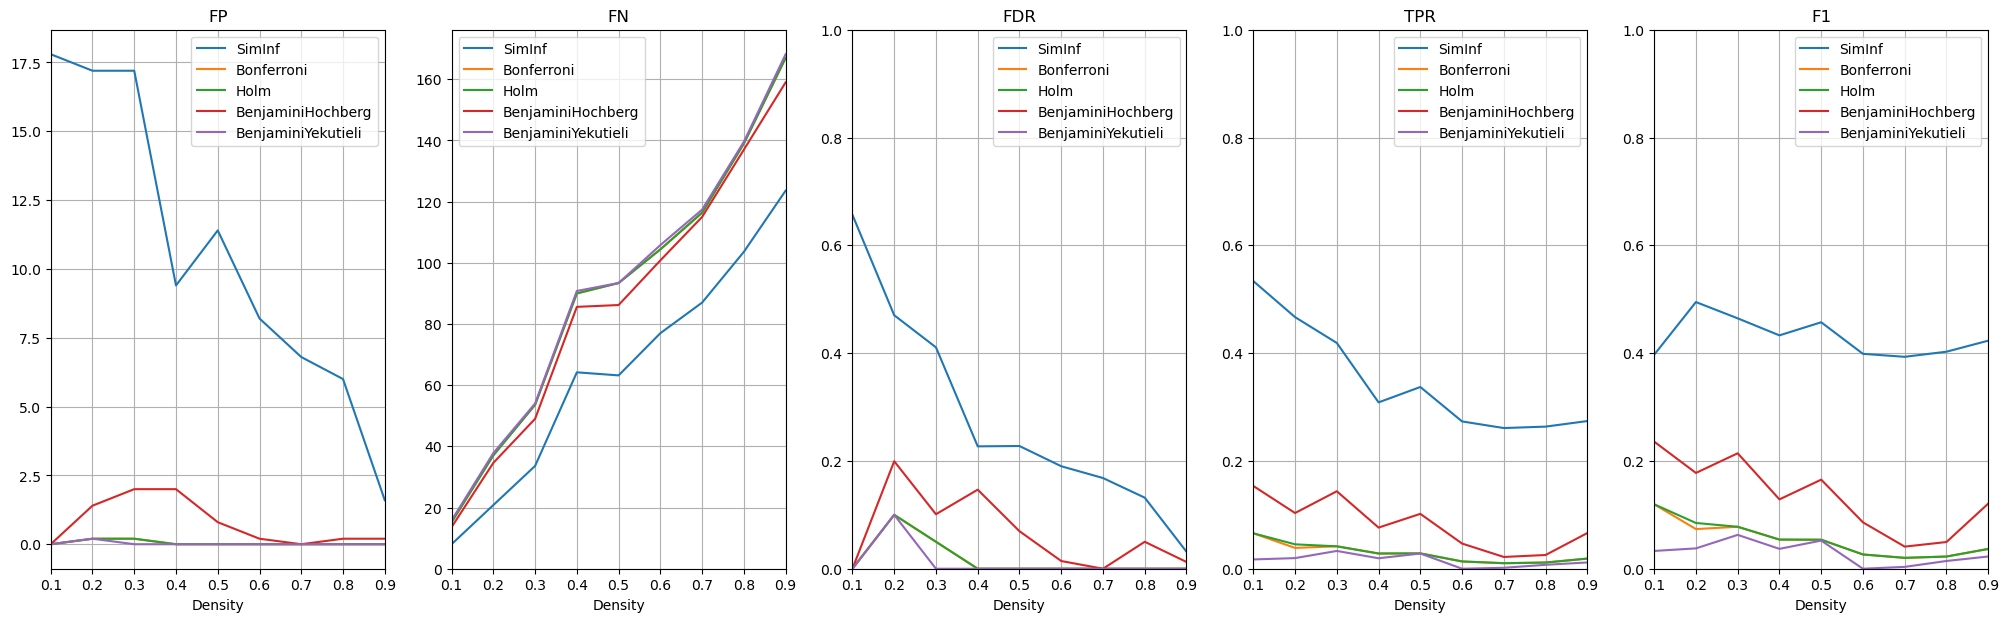

In [8]:
fig, axes = plt.subplots(1, 5)
axes = axes.flatten()
x = np.arange(0.1, 1, 0.1)

for idx, metric in enumerate(density_frames[0].columns):
    density_df = pd.concat([density_frame[metric] for density_frame in density_frames], axis=1).T
    density_df

    for method in density_frames[0].index:
        axes[idx].plot(x, density_df[method], label=method)
    axes[idx].legend()
    axes[idx].set_title(metric)
    axes[idx].set_xlabel('Density')
    axes[idx].set_xlim(0.1, 0.9)
    if idx > 1:
        axes[idx].set_ylim(0, 1)
    axes[idx].grid(True)
fig.set_size_inches((25, 7))

In [9]:
density_frames[-1]

,FP,FN,FDR,TPR,F1
SimInf,1.6,123.6,0.03151,0.273973,0.423082
Bonferroni,0.0,167.0,0.00000,0.018816,0.036699
Holm,0.0,167.0,0.00000,0.018816,0.036699
BenjaminiHochberg,0.2,159.0,0.01250,0.066217,0.120799
BenjaminiYekutieli,0.0,168.2,0.00000,0.011622,0.022677
